In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.path as mpath
import numpy as np
import cartopy.feature as cfeature
import traceback
from PIL import Image

In [2]:

july4_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/L8_OLI_2019_07_04_22_06_34_078010_L2W.nc')
july6_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_07_06_L2W.nc')
july13_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_07_13_L2W.nc')

sept8_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_09_08_L2W.nc')

oct10_2019 = xr.open_dataset('/Users/Anna/Desktop/NREIP_Fall22/Landsat8/2019_10_10_L2W.nc')

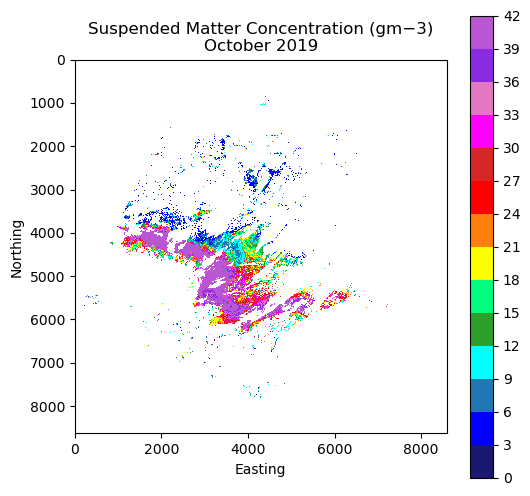

In [5]:

plt.figure(figsize=(6, 6))
# make a color map of fixed colors
#cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:pink', 'darkorchid'])
#bounds=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.4, 4, 4.5, 5, 5.5]
cmap = mpl.colors.ListedColormap(['midnightblue', 'blue','tab:blue','cyan','tab:green','springgreen','yellow', 'tab:orange', 'red', 'tab:red', 'fuchsia','tab:pink', 'blueviolet', 'mediumorchid'])
bounds=[0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


#img = plt.imshow(july4_2019.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)
#img = plt.imshow(july6_2019.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)
#img = plt.imshow(july13_2019.SPM_Nechad2016_655, interpolation='none',
#                    cmap = cmap, norm=norm)

#img = plt.imshow(sept8_2019.SPM_Nechad2016_655, interpolation='none',
#                   cmap = cmap, norm=norm)

img = plt.imshow(oct10_2019.SPM_Nechad2016_655, interpolation='none',
                    cmap = cmap, norm=norm)

# make a color bar
plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0, 42.0])
plt.xlabel("Easting")
plt.ylabel("Northing")
#plt.title("Chlorophyll Concentration (µg/l) October 2022\n (3 bands)")
plt.title("Suspended Matter Concentration (gm−3)\nOctober 2019")
plt.show()

In [6]:
print(july6_2019.chl_oc2.shape)
#print(july13_2019.chl_oc2.shape)
#print(oct10_2019.chl_oc2.shape)

print('July 4 2019', july4_2019.chl_oc2.shape)
print('Sept 8 2019:', sept8_2019.chl_oc2.shape)

(8631, 8581)
July 4 2019 (8771, 8731)
Sept 8 2019: (8631, 8581)


In [7]:

lat_07_06_19 = july6_2019.lat.values
lon_07_06_19 = july6_2019.lon.values
c2_07_06_19 = july6_2019.chl_oc2.values
#(8631, 8581)

lat_07_13_19 = july13_2019.lat.values
lon_07_13_19 = july13_2019.lon.values
c2_07_13_19 = july13_2019.chl_oc2.values
#(8631, 8581)

lat_10_10_19 = oct10_2019.lat.values
lon_10_10_19 = oct10_2019.lon.values
c2_10_10_19 = oct10_2019.chl_oc2.values
#(8631, 8591)

lat_07_04_19 = july4_2019.lat.values
lon_07_04_19 = july4_2019.lon.values
c2_07_04_19 = july4_2019.chl_oc2.values
#(8771, 8731)

lat_09_08_19 = sept8_2019.lat.values
lon_09_08_19 = sept8_2019.lon.values
c2_09_08_19 = sept8_2019.chl_oc2.values
#(8631, 8581)

In [9]:
new_chl2_07_06_19 = np.zeros((len(lat_07_06_19), len(lon_07_06_19)))
new_chl2_07_06_19 [:]=np.nan
new_chl2_07_13_19 = np.zeros((len(lat_07_13_19), len(lon_07_13_19)))
new_chl2_07_13_19 [:]=np.nan
new_chl2_07_04_19 = np.zeros((len(lat_07_04_19), len(lon_07_04_19)))
new_chl2_07_04_19 [:]=np.nan
new_chl2_09_08_19 = np.zeros((len(lat_09_08_19), len(lon_09_08_19)))
new_chl2_09_08_19 [:]=np.nan
new_chl2_10_10_19 = np.zeros((len(lat_10_10_19), len(lon_10_10_19)))
new_chl2_10_10_19 [:]=np.nan

In [10]:

for x in range(0,8771):
    for y in range(0,8731):
            if c2_07_04_19[x,y] <= 5.49:
                new_chl2_07_04_19[x,y] = c2_07_04_19[x,y]

chl2_07_04_19 = np.nanmean(new_chl2_07_04_19)
print(chl2_07_04_19)

for x in range(0,8631):
    for y in range(0, 8581):
            if c2_09_08_19[x,y] <= 5.49:
                new_chl2_09_08_19[x,y] = c2_09_08_19[x,y]

chl2_09_08_19 = np.nanmean(new_chl2_09_08_19)
print(chl2_09_08_19) 


for x in range(0, 8631):
    for y in range(0, 8581):
            if c2_07_06_19[x,y] <= 5.49:
                new_chl2_07_06_19[x,y] = c2_07_06_19[x,y]

chl2_07_06_19 = np.nanmean(new_chl2_07_06_19)
print(chl2_07_06_19)

for x in range(0, 8631):
    for y in range(0, 8581):
            if c2_07_13_19[x,y] <= 5.49:
                new_chl2_07_13_19[x,y] = c2_07_13_19[x,y]

chl2_07_13_19 = np.nanmean(new_chl2_07_13_19)
print(chl2_07_13_19)


for x in range(0, 8631):
    for y in range(0, 8591):
            if c2_10_10_19[x,y] <= 5.49:
                new_chl2_10_10_19[x,y] = c2_10_10_19[x,y]

chl2_10_10_19 = np.nanmean(new_chl2_10_10_19)
print('last one:', chl2_10_10_19)

2.040364928742909
1.5855922025918172
1.783970163381241
1.344206887016298
last one: 2.100514239177237


In [11]:
chl2_07_04_19 = np.nanmean(new_chl2_07_04_19) ###
chl2_07_06_19 = np.nanmean(new_chl2_07_06_19) 
chl2_07_13_19 = np.nanmean(new_chl2_07_13_19)
chl2_09_08_19 = np.nanmean(new_chl2_09_08_19) 
chl2_10_10_19 = np.nanmean(new_chl2_10_10_19) 

In [12]:

chl2_jul19_mean = (chl2_07_06_19 + chl2_07_13_19 + chl2_07_04_19) / 3
print('chl2_July2019 mean:', chl2_jul19_mean)


chl2_sept19_mean = chl2_09_08_19
print('chl2_sept19 mean:', chl2_sept19_mean)


chl2_oct19_mean = chl2_10_10_19
print('chl2_Oct19 mean:', chl2_oct19_mean)


chl2_July2019 mean: 1.7228473263801494
chl2_sept19 mean: 1.5855922025918172
chl2_Oct19 mean: 2.100514239177237


In [13]:
chl3_07_04_19 = np.nanmean(july4_2019.chl_oc3) ###
chl3_07_06_19 = np.nanmean(july6_2019.chl_oc3) 
chl3_07_13_19 = np.nanmean(july13_2019.chl_oc3)
chl3_09_08_19 = np.nanmean(sept8_2019.chl_oc3) 
chl3_10_10_19 = np.nanmean(oct10_2019.chl_oc3) 

In [14]:
chl3_jul19_mean = (chl3_07_06_19 + chl3_07_13_19 +chl3_07_04_19) / 3
print('chl3_July2019 mean:', chl3_jul19_mean)

chl3_sept19_mean = chl3_09_08_19
print('chl3_sept19 mean:', chl3_sept19_mean)

chl3_oct19_mean = chl3_10_10_19
print('chl3_Oct19 mean:', chl3_oct19_mean)

chl3_July2019 mean: 2.494671026865641
chl3_sept19 mean: 1.7658281
chl3_Oct19 mean: 2.3943396


In [15]:
spm_07_04_19 = np.nanmean(july4_2019.SPM_Nechad2016_655) ###
spm_07_06_19 = np.nanmean(july6_2019.SPM_Nechad2016_655) 
spm_07_13_19 = np.nanmean(july13_2019.SPM_Nechad2016_655)
spm_09_08_19 = np.nanmean(sept8_2019.SPM_Nechad2016_655) 
spm_10_10_19 = np.nanmean(oct10_2019.SPM_Nechad2016_655) 

In [16]:
spm_jul19_mean = (spm_07_06_19 + spm_07_13_19 +spm_07_04_19) / 3
print('spm_July2019 mean:', spm_jul19_mean)

spm_sept19_mean = spm_09_08_19
print('spm_Sept19 mean:', spm_sept19_mean)

spm_oct19_mean = spm_10_10_19
print('spm_Oct19 mean:', spm_oct19_mean)


spm_July2019 mean: 14.757675170898438
spm_Sept19 mean: 9.262788
spm_Oct19 mean: 25.796642
